In [5]:
import matplotlib.pyplot as plt
import torch

In [6]:
import torchvision
import cv2
import PIL

We begin our analysis by finding a video that resembles our dataset. This video is [Video]("https://www.youtube.com/watch?v=TYvstGSZzyU"). We can use _youtube-dl_ to extract the video from youtube and download it locally. We will then crop it and use _openCV_ to extract and save frames from the video to analyze them.

``` bash
$: youtube-dl -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' "https://www.youtube.com/watch?v=TYvstGSZzyU"
```

In [7]:
camera = cv2.VideoCapture("./training-clip-1.mp4")

In [9]:
current_frame = 0
while(True):
      
    ret,frame = camera.read()
  
    if ret:
        if(current_frame % 2 == 0):
            name = './training-frames/frame-' + str(current_frame) + '.jpg'
            print ('Creating...' + name)

            cv2.imwrite(name, frame)

        current_frame += 1
    else:
        break
  
camera.release()
cv2.destroyAllWindows()

Once all frames have been extracted, we can begin comparing and analyzing consecutive frames. Note: we skip 1 frame in the video to save only notable distinctions between consecutive frames. 

Let's analyze frame 36 and frame 38, a hard shot taken at the keeper

In [12]:
frame_36 = PIL.Image.open("training-frames/frame-36.jpg")
frame_38 = PIL.Image.open("training-frames/frame-38.jpg")

Let's show these side by side for comparison

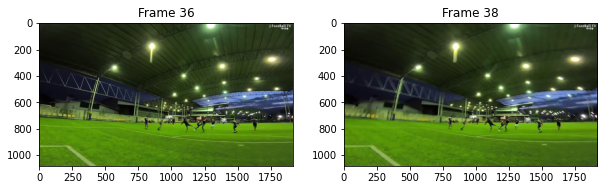

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(frame_36)
axs[0].set_title("Frame 36")
axs[1].imshow(frame_38)
axs[1].set_title("Frame 38")

plt.show()

We can immediately tell there isn't much different between images, however a neural network will have a completely different obseratvtion. Our goal during these research process is to determine what type of observation distinctions is our neural network capable of detecting and what can we do to better increase its performance of telling a keeper which way to move

In [16]:
import numpy as np

In [22]:
frame_36_array = np.asarray(frame_36)
frame_38_array = np.asarray(frame_38)

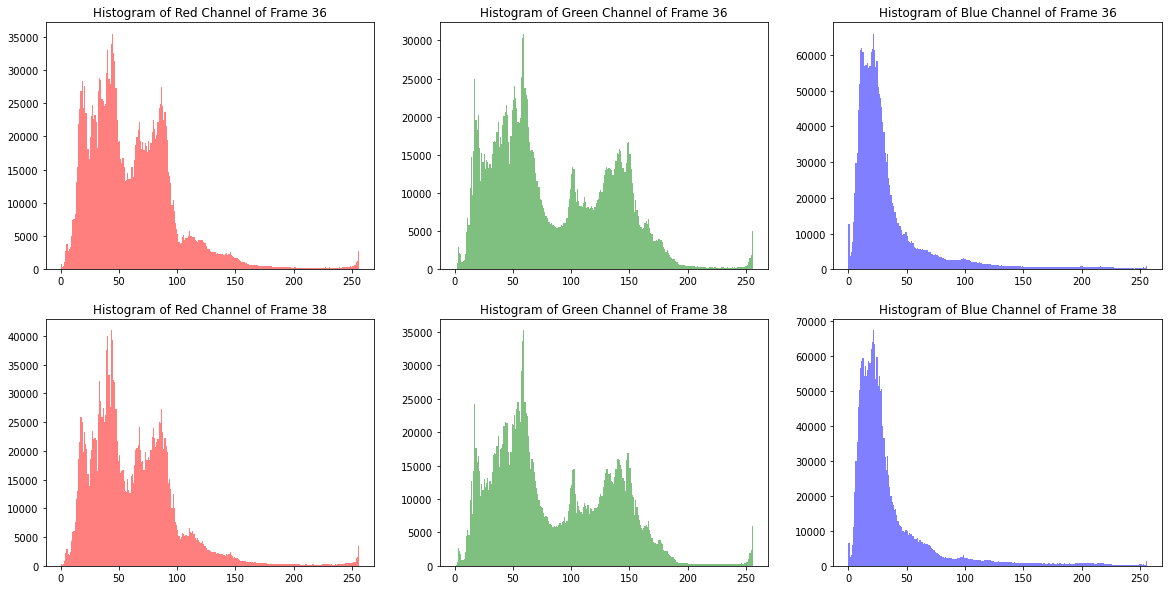

In [25]:
# Create a figure with six subplots, two for each RGB channel
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Display the histograms of the RGB channels in the subplots
for i, color in enumerate(['Red', 'Green', 'Blue']):
    axs[0, i].hist(frame_36_array[:,:,i].ravel(), bins=256, range=(0, 256), color=color.lower(), alpha=0.5)
    axs[0, i].set_title(f"Histogram of {color} Channel of Frame 36")
    axs[1, i].hist(frame_38_array[:,:,i].ravel(), bins=256, range=(0, 256), color=color.lower(), alpha=0.5)
    axs[1, i].set_title(f"Histogram of {color} Channel of Frame 38")

# Show the plot
plt.show()

We can tell that there is noticable motion blur in frame 38, which may contribute to changes between histograms channels. Keeper movement also contributes to this added motion blur. Let's compare two images with little to no motion blur, frames 32 and 34

In [28]:
frame_32 = PIL.Image.open("training-frames/frame-32.jpg")
frame_34 = PIL.Image.open("training-frames/frame-34.jpg")

frame_32_array = np.asarray(frame_32)
frame_34_array = np.asarray(frame_34)

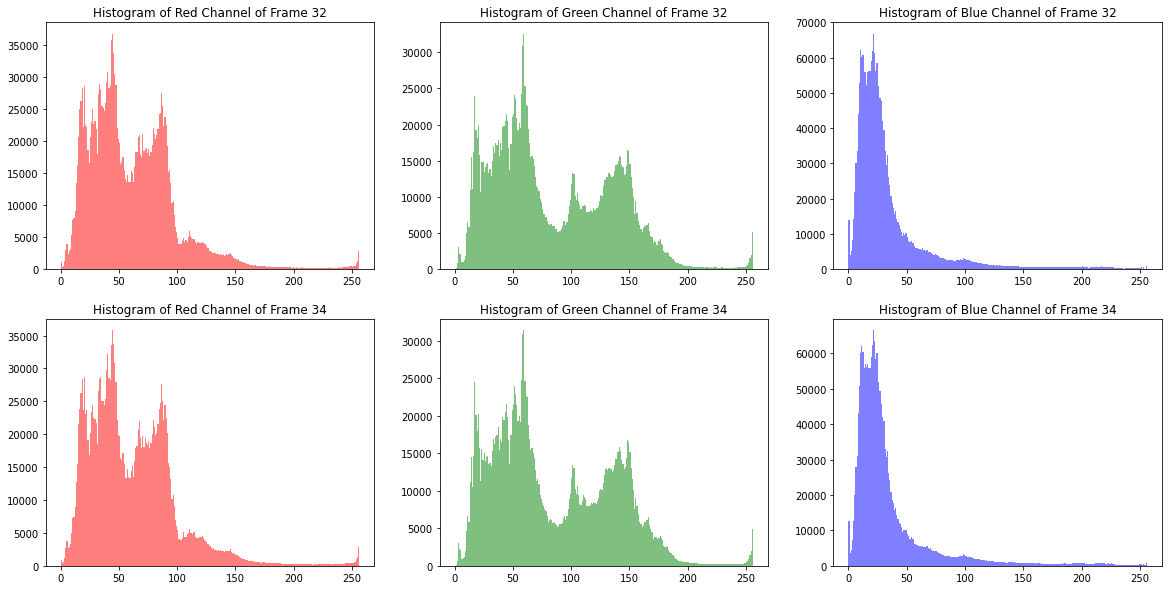

In [29]:
# Create a figure with six subplots, two for each RGB channel
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Display the histograms of the RGB channels in the subplots
for i, color in enumerate(['Red', 'Green', 'Blue']):
    axs[0, i].hist(frame_32_array[:,:,i].ravel(), bins=256, range=(0, 256), color=color.lower(), alpha=0.5)
    axs[0, i].set_title(f"Histogram of {color} Channel of Frame 32")
    axs[1, i].hist(frame_34_array[:,:,i].ravel(), bins=256, range=(0, 256), color=color.lower(), alpha=0.5)
    axs[1, i].set_title(f"Histogram of {color} Channel of Frame 34")

# Show the plot
plt.show()